# Table of Contents
- **[Arrays & Hashing](#arrays)**
- **[Two Pointers](#pointers)**
- **[Stack](#stack)**

## Arrays & Hashing <a name="arrays"></a>

### 217. Contains Duplicate 

In [ ]:
class Solution:
    def containsDuplicate(self, nums: List[int]) -> bool:
        return not len(set(nums)) == len(nums)

### 242. Valid Anagram

In [2]:
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        for char in s:
            if t == '':
                return False
            t = t.replace(char, '', 1)
        if t != '':
            return False
        return True

### 1. Two Sum

In [ ]:
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        for i in range(len(nums)):
            for j in range(i + 1, len(nums)):
                if nums[i] + nums[j] == target:
                    return [i, j]

### 49. Group Anagrams

#### My Initial Solution:

In [ ]:
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        if len(s) != len(t):
            return False
        for char in s:
            if not list(s).count(char) == list(t).count(char):
                return False
        return True

    def groupAnagrams(self, strs: List[str]) -> List[List[str]]:
        dict = {}
        for string in strs:
            addedToDict = False
            for key in dict.keys():
                if self.isAnagram(string, key):
                    arr = dict[key]
                    arr.append(string)
                    dict[key] = arr
                    addedToDict = True
            if not addedToDict:
                dict[string] = [string]
        return list(dict.values())

- The problem with this code is that very large sets don't run quickly enough.
- I am looking for ways to improve performance for that reason.
- Looking at the solution video it seems you have to use a dict with keys being the character count, i.e. {a:2, c:1, d:1} and values being a list of words matching that pattern.

#### Improved Solution:

In [ ]:
class Solution:
    def groupAnagrams(self, strs: List[str]) -> List[List[str]]:
        res = defaultdict(list)

        for string in strs:
            count = [0] * 26

            for c in string:
                count[ord(c) - ord('a')] += 1

            res[tuple(count)].append(string)

        return res.values()

- The way this works is, we create a list `count` for each string, which holds 26 fields, representing the frequency of the lowercase letters of the alphabet. 
- Then we go through the characters of each string and populate `count`. For example the string `cab` would result in `[1,1,1,0,0,...]`
- This will then be used as the key in the `res` dictionary, where we append the string to the corresponding list of values.
- These values are then returned as the result.
- An intuitive way to think about this, is that we are using histograms as keys, and lists of values fitting the pattern of the histogram, as values.

### 347. Top K Frequent Elements

In [ ]:
class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        counter = dict(Counter(nums))
        counter = dict(sorted(counter.items(), key=lambda item: item[1]))
        counterList = list(reversed(list(counter.keys())))
        res = []
        for i in range(k):
            res.append(counterList[i])
        return res

- My thought process here was to use the `Counter` object from python to count the occurences of each number in `nums`, and return the `k` most frequent numbers.
- To retrieve the most frequent numbers, I sorted the `counter` dictionary by it's values (ascending), extracted the keys as `counterList`, reversed `counterList` for a descending ordering, and returned the `k` first keys.

### 238. Product of Array Except Self

#### My Initial Solution:

In [ ]:
class Solution:
    def prod(self, nums: List[int]) -> int:
        prod = 1
        for i in range(len(nums)):
            prod = prod * nums[i]
        return prod
        
    def productExceptSelf(self, nums: List[int]) -> List[int]:
        res = [0] * len(nums)
        for i in range(len(nums)):
            if nums[i] != 0:
                res[i] = int(self.prod(nums) / nums[i])
            elif nums[i] == 0:
                temp = nums.copy()
                nums.pop(i) 
                res[i] = self.prod(nums)
                nums = temp
        return res

- Technically this works, but it is highly inefficient because each product is calculated by moving through the whole list, which results in a complexity of O(n^2).

#### Improved Solution:

In [ ]:
class Solution:
    #step 1: save the product for each unique number in a dict
    #step 2: go through nums and for each number paste the corresponding value of the dict into the result array 
    def prod(self, nums: List[int]) -> int:
        prod = 1
        for i in range(len(nums)):
            prod = prod * nums[i]
        return prod

    def productExceptSelf(self, nums: List[int]) -> List[int]:
        unique = list(set(nums))
        uniqueDict = defaultdict(int)
        for num in unique:
            temp = nums.copy()
            nums.remove(num)
            uniqueDict[num] = self.prod(nums)
            nums = temp 
        res = [0] * len(nums)
        for count, num in enumerate(nums):
            res[count] = uniqueDict[num]
        return res

- What I have done to drastically improve the performance and reduce the complexity to O(n), was to first retrieve all unique values inside of `nums`, and save them inside of `unique`.
- Then I created a dictionary `uniqueDict`, which would hold the product corresponding to each of the unique numbers.
- Lastly I went through `nums` and populated the `res` list with the matching dictionary entries for each `num` in `nums`.

### 36. Valid Sudoku

In [ ]:
class Solution:
    def isValidSudoku(self, board: List[List[str]]) -> bool:
        # Step 1 validate rows
        valid = range(1, 10)
        isValid = True
        for i in range(len(board)):
            row = [int(val) for val in board[i] if val != "."]
            print(row)
            if not sorted(row) == sorted(list(set(row))):
                isValid = False
            for val in row:
                if not val in valid:
                    isValid = False
        print(f'rows are {isValid}')
        # Step 2 validate cols
        colCount = 0
        while colCount < len(board):
            col = []
            for i in range(len(board)):
                col.append(board[i][colCount])
            col = [int(val) for val in col if val != "."]
            print(col)
            if not sorted(col) == sorted(list(set(col))):
                isValid = False
            for val in col:
                if not val in valid:
                    isValid = False
            colCount += 1
        print(f'cols are {isValid}')
        # Step 3 validate blocks
        layer = 0
        block = 0
        for i in range(len(board)):
            vals = []
            if block == 9:
                block = 0
                layer += 3
            for j in range(3):
                for i in range(3):
                    vals.append(board[block + j][layer + i])
            vals = [int(val) for val in vals if val != "."]
            print(vals)
            if not sorted(vals) == sorted(list(set(vals))):
                isValid = False
            for val in vals:
                if not val in valid:
                    isValid = False
            block += 3
        print(f'blocks are {isValid}')
        return isValid

- This task was pretty straightforward. I went through it in three distinct steps.
- First, I extracted the rows of the board, and validated them by making sure that each `row` only contains unique values from 1 to 9.
- The second and third step follow the exact same pattern, although I had to put some more effort into properly indexing the blocks in step three.

### 271. Encode and Decode Strings

#### Provisional Solution:

In [ ]:
class Solution:
    def encode(self, strs: List[str]) -> str:
        res = ''
        for i, string in enumerate(strs):
            if i != len(strs) - 1:
                res = res + string + ':;'
            else:
                res = res + string
        return res
    
    def decode(self, str) -> List[str]:
        strs = str.join(':;')
        return strs

- Due to this being a problem that requires leetcode premium, I am unable to check whether my solution would be accepted.
- For now I will leave this solution here, but it is definitely subject to change and likely will not pass the tests.

### 128. Longest Consecutive Sequence

In [ ]:
class Solution:
    def longestConsecutive(self, nums: List[int]) -> int:
        if nums == []:
            return 0
        s_nums = sorted(list(set(nums)))
        count = 1
        res = 1
        for i in range(len(s_nums) - 1):
            if s_nums[i] == s_nums[i+1] - 1:
                count += 1
                if i == len(s_nums) - 2 and count > res:
                    res = count
            else:
                if count > res:
                    res = count
                count = 1
        return res

- To solve this problem, I first converted `nums` into a sorted and unique list `s_nums`. 
- Similarly to finding the maximum value in a list, I traversed `s_nums` and saved the state of the longest sequence of elements increasing by steps of one, inside of `res`.

## Two Pointers <a name="pointers"></a>

### 125. Valid Palindrome

In [ ]:
class Solution:
    def isPalindrome(self, s: str) -> bool:
        s = re.sub(r'\W', '', s)
        s = s.lower()
        s = s.replace('_', '')
        if s == '':
            return True
        print(s)
        half = int(len(s) / 2)
        print(f'len {len(s)} half {half}')
        for i in range(half):
            print(f'comparing {s[i]} : {s[len(s) - 1 - i]}')
            if s[i] != s[len(s) - 1 - i]:
                return False
        return True

- As the description of this task mentions, a String is a palindrome when its reduction to alphanumeric and lowercase letters, reads the same forward and backward.
- To this end, I have used a regular expression and the `lower()` method to convert `s` into the desired format.
- Lastly, I iterated through `half` the length of `s`, starting with one pointer at the end of `s` and another pointer at the start of `s`, and compared their characters.

### 167. Two Sum II - Input Array Is Sorted

In [ ]:
class Solution:
    def twoSum(self, numbers: List[int], target: int) -> List[int]:
        for i, num in enumerate(numbers):
            if i < len(numbers) - 2 and num == numbers[i+2]:  
                continue
            for j in range(i+1, len(numbers)):
                if num + numbers[j] == target:
                    print(f'target reached with {i}, {j}')
                    return [i+1,j+1]
                elif num + numbers[j] > target:
                    break

- The way I approached this problem, was to iterate through every `num` in `numbers`, and for every `num`, to iterate over all subsequent numbers, until either the target is reached, or the sum is greater than the `target`.
- To avoid unnecessary calculations of sums, the inner loop breaks as soon as the sum is greater than `target`.
- I had to add another conditional check at the start of the outer loop, to further increase performance for large inputs.
- The first check will ensure that we avoid entering the inner loop, as long as there are more than two subsequent numbers with the same value.
- Both breaking out of the loop and the first conditional only work because the list is sorted.

### 15. 3Sum

#### My Initial Solution:

In [ ]:
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        res = []
        for i in range(len(nums)):
            for j in range(i+1, len(nums)):
                for k in range(j+1, len(nums)):
                    if nums[i] + nums[j] + nums[k] == 0:
                        arr = sorted([nums[i],nums[j],nums[k]])
                        if not arr in res:
                            res.append(arr)
        return res

- This works, but it is quite inefficient and therefore exceeds the time limit on larger inputs.
- I have to think about a way of reducing the time complexity of my solution from O(n^3) to something smaller.

#### Another Solution:

In [ ]:
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        if list(set(nums)) == [0]:
            return [[0,0,0]]
        res = []
        if nums.count(0) >= 3:
            res.append([0,0,0])
        flag = 0 in nums
        nums = [num for num in nums if num != 0]
        if flag:
            nums.append(0)
        s_nums = sorted(nums)
        if len(s_nums) == 3 and abs(s_nums[0]) == s_nums[2] and s_nums[1] == 0:
            return [s_nums]
        print(f'sorted nums: {s_nums}')
        # Step 1: Two pointers on the elements leftmost of 0 and one on the rightmost element
        right = len(nums) - 1
        while(s_nums[right] > 0):
            if s_nums[0] >= 0 or s_nums[1] >= 0:
                break
            if abs(s_nums[right]) > abs(s_nums[0] + s_nums[1]):
                right -= 1
                continue
            for i in range(len(s_nums)):
                if s_nums[i] == 0:
                    break
                for j in range(i+1, len(s_nums)):
                    if s_nums[j] > 0:
                        break
                    if abs(s_nums[i] + s_nums[j]) < s_nums[right]:
                        break
                    elif abs(s_nums[i] + s_nums[j]) == s_nums[right]:
                        arr = sorted([s_nums[i], s_nums[j], s_nums[right]])
                        if not arr in res:
                            res.append(arr)
            right -= 1
        print(f'res after starting with two pointers on the left of 0: {res}')
        # Step 2: Two pointers on the elements rightmost of 0 and one on the leftmost element
        left = 0
        while(s_nums[left] < 0):
            if s_nums[len(nums) - 2] <= 0 or s_nums[len(nums) - 1] <= 0:
                break
            if abs(s_nums[left]) > abs(s_nums[len(nums) - 2] + s_nums[len(nums) - 1]):
                left += 1
                continue
            for i in reversed(range(len(s_nums))):
                if s_nums[i] == 0:
                    break
                for j in reversed(range(i)):
                    if s_nums[j] < 0:
                        break
                    if s_nums[i] + s_nums[j] < abs(s_nums[left]):
                        break
                    elif s_nums[i] + s_nums[j] == abs(s_nums[left]):
                        arr = sorted([s_nums[i], s_nums[j], s_nums[left]])
                        if not arr in res:
                            res.append(arr)
            left += 1
        print(f'res after starting with two pointers on the right of 0: {res}')
        return res

- This solution is a bit faster than my first solution, but it is still not fast enough to pass the tests for large inputs.
- In this solution I am handling a few edge cases at the beginning of the code, and then traverse the sorted `s_nums`.
- In the first `while` loop I placed two pointers on the negative half of the sorted array, and compare their absolute sum to the rightmost element. 
- When no combination of two negative values has yielded the positive element on the right, I decrease the rightmost pointer by one, and try to match it with combinations of negative values again. 
- The same process is repeated in the next `while` loop, starting with two pointers to the rightmost elements.

#### Yet Another Solution:

In [ ]:
class Solution:
    def twoSum(self, numbers: List[int], target: int, solutions: List[list]) -> List[int]:
        for i, num in enumerate(numbers):
            if i < len(numbers) - 2 and num == numbers[i+2]:  
                continue
            for j in range(i+1, len(numbers)):
                if num + numbers[j] == target and not [num, numbers[j], -target] in solutions:
                    return [numbers[i],numbers[j]]
                elif num + numbers[j] > target:
                    break
        return None
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        res = []
        solutions = defaultdict(list)
        s_nums = sorted(nums)
        unique_s_nums = sorted(list(set(s_nums)))
        for i in range(len(unique_s_nums)):
            fixed = unique_s_nums[i]
            temp = s_nums.copy()
            s_nums.remove(fixed)
            ts = []
            while not ts is None:
                ts = self.twoSum(s_nums, -fixed, solutions[fixed])
                if not ts is None:
                    ts.append(fixed)
                    solutions[fixed].append(ts)
                    arr = sorted(ts)
                    if not arr in res:
                        res.append(arr)
            s_nums = temp
        return res

- Looking at the hints, it became clear that you are supposed to reduce the problem to a two sum, by fixing one value at a time.
- I iterated through the unique values in `nums` via `unique_s_nums`, and for each value `fixed`, I retrieved all possible two sums via the helper function `twoSum`.
- It is still not efficient enough to pass with large inputs.

#### Improved Solution:

In [ ]:
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        res = []
        s_nums = sorted(nums)

        for i, num in enumerate(s_nums):
            if i > 0 and s_nums[i-1] == s_nums[i]:
                continue
            left, right = i+1, len(s_nums)-1
            while left < right:
                s = num + s_nums[left] + s_nums[right]
                if s > 0:
                    right -= 1
                    continue
                elif s < 0:
                    left += 1
                    continue
                elif s == 0:
                    res.append([num, s_nums[left], s_nums[right]])
                    left += 1
                    while s_nums[left-1] == s_nums[left] and left < right:
                        left += 1
        return res

- After coding out another inefficient solution which I have not included here, I decided to check out the solution.
- The way it works is that we first sort `nums` and save it in `s_nums`, then we iterate through `s_nums`, skipping duplicate elements, and for each number we find the matching two sums in the remainder of `s_nums` to the right.
- The two sums in the remaining list can be found by placing a pointer `left` on the leftmost element and a pointer `right` on the rightmost element, and moving the pointers closer together until all matching two sums have been found.
- More specifically, when the current sum `s` is greater than `0`, we move the `right` pointer inward, and when `s` is less than `0`, we move the `left` pointer inward.

### 11. Container With Most Water

#### My Initial Solution:

In [ ]:
class Solution:
    def area(self, i: int, j: int, height: List[int]) -> int:
        return min(height[i], height[j]) * (j - i)

    def maxArea(self, height: List[int]) -> int:
        res = 0
        for i in range(len(height)):
            for j in range(i+1, len(height)):
                ar = self.area(i, j, height)
                if ar > res:
                    res = ar
        return res

- This does return the correct results, but it is not efficient enough on larger inputs.
- I have to find a way to reduce the time complexity from O(n^2), because as is, I am calculating the area for all possible tuples.

#### Improved Solution:

In [ ]:
class Solution:
    def area(self, i: int, j: int, height: List[int]) -> int:
        return min(height[i], height[j]) * (j - i)

    def maxArea(self, height: List[int]) -> int:
        res = 0
        left = 0
        right = len(height) - 1
        while(abs(left-right) > 1):
            ar = self.area(left, right, height)
            if ar > res:
                res = ar
            if height[left] <= height[right]:
                left += 1
            elif height[left] > height[right]:
                right -= 1
        ar = self.area(left, right, height)
        if ar > res:
            res = ar
        return res

- A hint I received on the page was *"Try to use two-pointers. Set one pointer to the left and one to the right of the array. Always move the pointer that points to the lower line."*
- Thanks to this hint, I was able to come up with a solution with time complexity O(n).
- The way it works is, `left` is an index to the leftmost element in `height` and `right` is an index to the rightmost element. We iterate through the elements in `height` until `left` and `right` are at a distance of 1 from each other.
- We calculate the area `ar` between `left` and `right` in each iteration, saving the state of the largest area in `res`.

### 42. Trapping Rain Water

In [ ]:
class Solution:
    def validate(self, block: int ,height: List[int]) -> tuple[bool, int]:
        remainder = height[block+2:len(height)]
        if remainder == []:
            return False, 0
        if height[block] > height[block+1] and height[block+1] < max(remainder):
            #print(f'{height[block]} > {height[block+1]} and {height[block+1]} < {max(remainder)} => detected pool')
            return True, max(remainder)
        #print(f'{height[block]} > {height[block+1]} and {height[block+1]} < {max(remainder)} => continue')
        return False, 0

    def trap(self, height: List[int]) -> int:
        left,right = 0,1
        res = 0
        
        while left < len(height):
            #print(f'left: {left} right: {right}')
            loop, highest = self.validate(left, height)
            if loop:
                #print(f'pool height: {min(highest, height[left])}')
                while height[right] < min(highest, height[left]):
                    res += min(highest, height[left]) - height[right]
                    #print(f'res = {min(highest, height[left])} - {height[right]} = {res}')
                    right += 1
                left = right
                right += 1
            else:
                left += 1
                right += 1
        return res

- We iterate over `height` with two pointers `left` and `right`, starting on the first and second element respectively.
- I had to write a helper function, `validate`, that will check two conditions to decide whether an element in the iteration should be skipped or not. If an element is skipped, `left` and `right` move one position further to the right.
- The first condition is that the height of `left` is greater than the height of `right`.
- The second condition is that the largest value `highest` in the remaining list to the right of `right`, called `remainder`, is greater than the height of `right`.
- In the inner loop, we iterate over the *"pool"*, which has a height of the minimum of `highest`, and the height of `left`, and add the amount of *"water"* contained in the *"pool"* to `res`.

## Stack <a name="stack"></a>

### 20. Valid Parentheses

In [ ]:
class Solution:
    def isValid(self, s: str) -> bool:
        if len(s) % 2 != 0:
            return False
        stack = []
        for c in s:
            if c in '[{(':
                stack.append(c)
            elif c in '}])' and stack != []:
                t = stack.pop()
                if c == '}' and t != '{' or c == ')' and t != '(' or c == ']' and t != '[':
                    return False
            elif c in '}])' and stack == []:
                return False
        if stack != []:
            return False
        return True

- The solution here was pretty straightforward, although there were a couple of edge cases that I did not pay attention to at first.
- The way I implemented it was to iterate over the string `s` and push any opening parantheses onto the `stack`, and whenever there is a closing parantheses, it has to be the closing parantheses to the opening parantheses on top of the `stack`, which we retrieve with `pop()`.
- If there are still opening parantheses on the stack after iterating through `s`, or if there are closing parantheses while the `stack` is empty, `s` is not valid.

### 150. Evaluate Reverse Polish Notation 

In [ ]:
class Solution:
    def evalRPN(self, tokens: List[str]) -> int:
        stack = []
        for token in tokens:
            #print(f'token: {token} stack: {stack}')
            try:
                num = int(token)
                stack.append(num)
            except ValueError:
                num1 = stack.pop()
                num2 = stack.pop()
                if token == '+':
                    stack.append(num1 + num2)
                elif token == '*':
                    stack.append(num1 * num2)
                elif token == '-':
                    stack.append(num2 - num1)
                elif token == '/':
                    stack.append(int(num2 / num1))
        return stack.pop()

- This works by iterating over the list of `tokens` and pushing every number `num` onto the stack, and whenever we encounter an arithmetic operator, we pop the two elements on top of the stack, `num1` and `num2`, and push the result of the arithmetic operation back onto the stack.
- The last remaining value on the stack will be our return value.

### 155. Min Stack

In [ ]:
class MinStack:

    def __init__(self):
        self.s1 = []
        self.s2 = []

    def push(self, val: int) -> None:
        self.s1.append(val)
        if self.s2 == [] or self.s2 != [] and val <= self.s2[-1]:
            self.s2.append(val)
        #print(f'push: {self.s1}, {self.s2}')
        
    def pop(self) -> None:
        val = self.s1.pop()
        if val == self.s2[-1]:
            self.s2.pop()
        #print(f'pop: {self.s1}, {self.s2}')

    def top(self) -> int:
        #print(f'top: {self.s1}, {self.s2}')
        return self.s1[-1]

    def getMin(self) -> int:
        #print(f'getMin: {self.s1}, {self.s2}')
        return self.s2[-1]


# Your MinStack object will be instantiated and called as such:
# obj = MinStack()
# obj.push(val)
# obj.pop()
# param_3 = obj.top()
# param_4 = obj.getMin()

- I approached this problem by utilizing two stacks, `s1` and `s2`, where `s1` holds the actual values of the stack and `s2` saves information about the current minimum in `s1`.
- Whenever a value is pushed onto `s1` and the value is less or equal to the `top` element in `s2`, it will be pushed onto `s2` as the current minimum of `s1`.
- When an element is popped from `s1` and it is equal to the `top` element in `s2`, that means we are popping the current minimum of `s1`, and the element will also be popped from `s2`.

### 22. Generate Parantheses

#### My Initial Solution:

In [ ]:
class Solution:
    def isValid(self, s: str) -> bool:
        if len(s) % 2 != 0:
            return False
        stack = []
        for c in s:
            if c in '[{(':
                stack.append(c)
            elif c in '}])' and stack != []:
                t = stack.pop()
                if c == '}' and t != '{' or c == ')' and t != '(' or c == ']' and t != '[':
                    return False
            elif c in '}])' and stack == []:
                return False
        if stack != []:
            return False
        return True
    
    def kbits(self, n, k) -> list[str]:
        res = []
        for binary in itertools.combinations(range(n), k):
            s = [')'] * n
            for bit in binary:
                s[bit] = '('
            res.append(''.join(s))
        return res

    def generateParenthesis(self, n: int) -> List[str]:
        res = []
        pot = self.kbits(2*n, n)
        for p in pot:
            valid = self.isValid(p)
            if valid:G
                res.append(p)
        return res

- I had a lot of difficulties figuring out a solution for this problem, and I am convinced that this is not the intended solution, but it was accepted nonetheless.
- How it works is that we generate all possible ways to pick `n` opening parantheses in a string of length `2n`, where the remaining elements will be closing parantheses.
- Then we reuse `isValid` from problem `20. Valid Parantheses`, to filter out all valid combinations of parantheses.

#### Improved Solution:

In [ ]:
class Solution:
    def bt(self, opened: int, closed: int, res: str, n: int, arr: list[str]) -> None:
        if closed > opened or opened > n or closed > n:
            # invalid solution / overshooting n
            return
        if closed == opened and closed == n:
            # print(f'appending {res} to {arr}')
            arr.append(res)
            return
        self.bt(opened+1, closed, res + '(', n, arr)
        self.bt(opened, closed+1, res + ')', n, arr)
    def generateParenthesis(self, n: int) -> List[str]:
        res = []
        self.bt(0,0,'',n,res)
        return res

- The intended Solution was to use backtracking with a cutoff condition of `closed > opened` and a result condition of `opened == closed == n`.
- I achieved this with the recursive function `bt`, which calls itself until it either reaches the cutoff condition or a valid result `res` has been found, which will be appended to `arr`, the list holding all valid results.


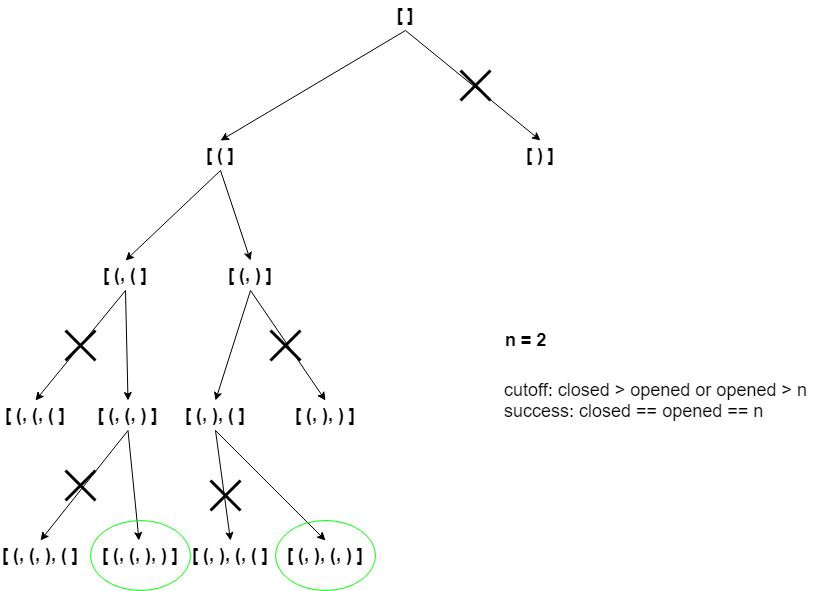